# **EDA(1주차 세션)**

해당 데이터셋 : https://www.kaggle.com/datasets/sakshisatre/tips-dataset

하단 셀을 실행하여 데이터셋을 다운받아주세요.

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df.to_csv("tips.csv", index=False)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 문제 1) Tips 데이터를 구체적으로 분석하는 문제입니다.


(1) Tips 데이터의 “분석 목적”을 1문장으로 정의하고,

답안 : 고객의 결제 및 방문 특성(성별, 총 지불 금액, tip, 흡연 여부, 방문 시간 등)을 바탕으로 팁 지불 행동에 영향을 미치는 요인을 파악하여, 서비스 전략 및 운영 개선을 통한 매출 증대이다.











(2) 독립변수들을 (연속형/범주형) 으로 분류하고, 각 타입에 맞는 EDA 방법(Ex. boxplot, countplot, 히스토그램)을 1개씩 매칭하여 표를 채워주세요.

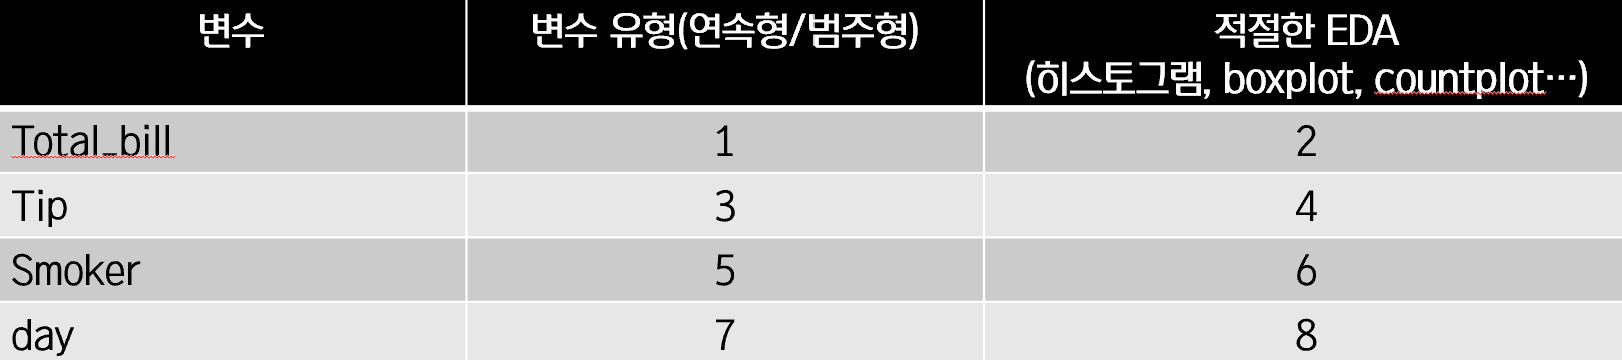


1: 연속형

2: 히스토그램
(어떤 분포를 가지고 있고, 치우침이 있는지, 단봉/다봉인지 판단)
3: 연속형

4: boxplot
(팁의 전형적 수준이 얼마이고, 극단적으로 큰 팁은 보이는지, 이상치가 평균을 왜곡하지 않는지 판단)

5: 범주형

6: countplot

7: 범주형

8: countplot

Q1. total_bill 분포가 오른쪽으로 치우치면 분석 또는 모델링에 어떤 문제가 생기는지 간략히 설명하세요.





답안: total_bill 분포가 오른쪽으로 치우친 경우, 극단적으로 큰 값이 평균과 분산을 왜곡하여 이후 회귀 계수 추정이 불안정해지고, 모델이 일부 고액 결제 사례에 과도하게 영향을 받는 문제가 발생할 수 있다.

Q2. total_bill과 tip을 산점도로 그렸을 때 양의 관계가 보인다면 이것이 의미하는 바가 무엇인지 쓰세요.

답안: total_bill과 tip 사이에 산점도에서 양의 관계가 보인다는 것은, 결제 금액이 증가할수록 팁 금액도 함께 증가하는 경향이 있음을 의미하며, 이는 두 변수 간에 양의 상관관계가 존재함을 시사한다. 이는 인과를 의미하지는 않는다.

Q3. Boxplot에서 극단적으로 큰 total_bill 값이 관측되었다고 할 때,
아래 중 가장 적절하다고 생각하는 방법 1개를 선택하고 이유를 쓰세요.

① 삭제

② 로그 변환

③ 그대로 둔다

답안 : 로그 변환

이유 : 극단적으로 큰 total_bill 값이 실제로 가능한 (일어난) 고액 결제라면 데이터 오류로 볼 수 없고, 데이터 자체의 특성이라고 보는 것이 타당하므로 삭제는 정보 손실을 초래할 수 있다.

반면 로그 변환을 적용하면 오른쪽으로 치우친 분포를 완화하고 이상치의 영향력을 줄여서 모델의 안정성과 해석 가능성을 높여준다.

# 문제 2) Tips 데이터셋에 대한 EDA 파이프라인을 완성하세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
(244, 7)
duplicates: 1
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


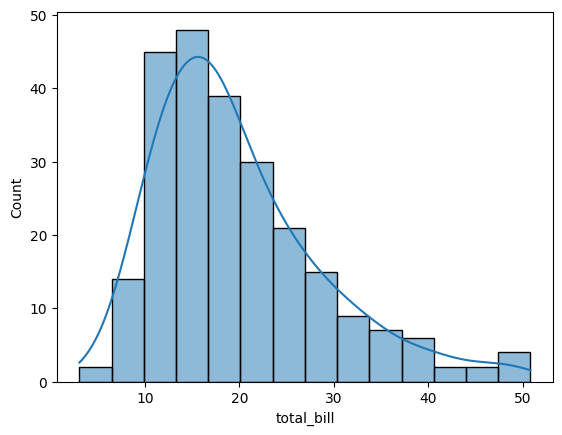

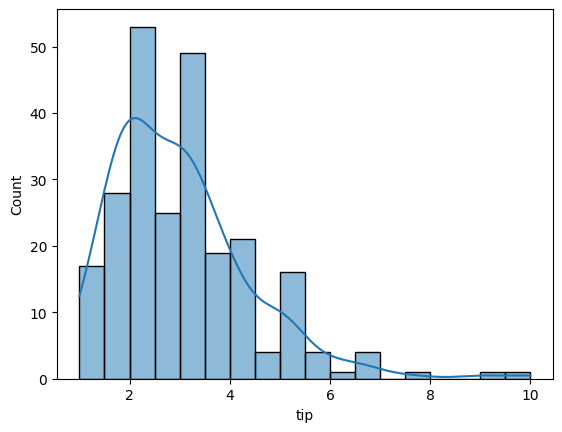

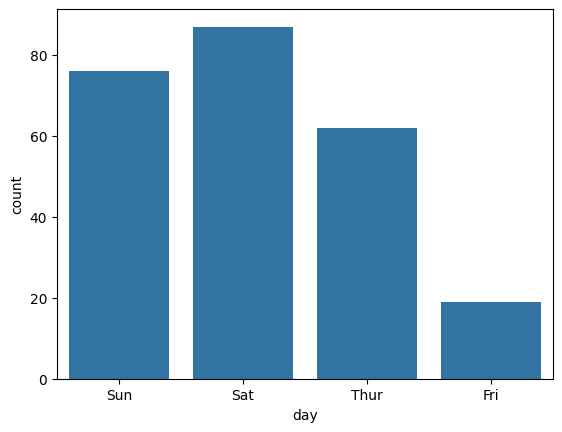

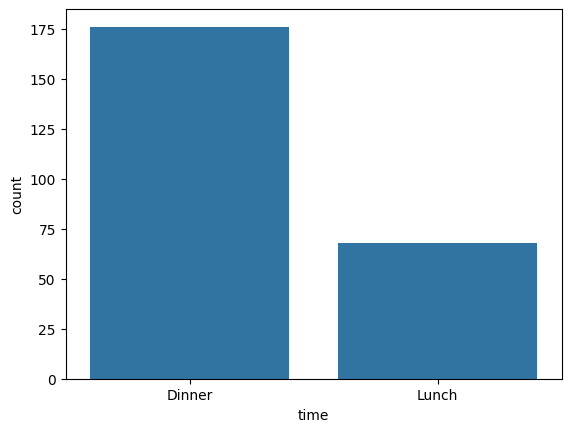

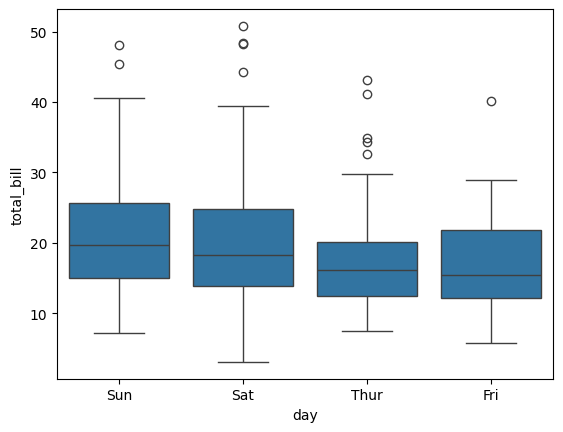

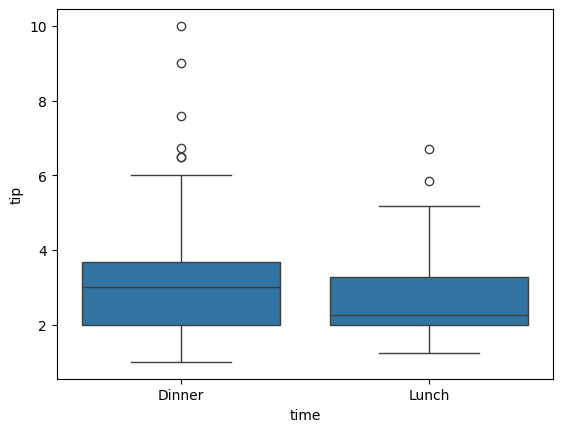

           mean  median  count
day                           
Sun   21.410000   19.63     76
Sat   20.441379   18.24     87
Thur  17.682742   16.20     62
Fri   17.151579   15.38     19


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) 구조/요약 확인
df.head()
df.info()
print(df.shape)

# 2) 중복행 확인 및 개수 출력
dup_cnt = df.duplicated().sum()
print("duplicates:", dup_cnt)

# 3) 결측치 확인 (변수별 결측 개수)
miss = df.isnull().sum()
print(miss)

# 4) 연속형 분포 확인: total_bill, tip (히스토그램 2개)
sns.histplot(data=df, x="total_bill", kde=True)
plt.show()

sns.histplot(data=df, x="tip", kde=True)
plt.show()

# 5) 범주형 빈도 확인: day, time (countplot 2개)
sns.countplot(data=df, x="day")
plt.show()

sns.countplot(data=df, x="time")
plt.show()

# 6) 범주별 연속형 비교: day별 total_bill / time별 tip (boxplot 2개)
sns.boxplot(data=df, x="day", y="total_bill")
plt.show()

sns.boxplot(data=df, x="time", y="tip")
plt.show()

# 7) 그룹 통계표: day별 total_bill의 평균/중앙값/개수
summary = df.groupby("day")["total_bill"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)
print(summary)

(1) 위 EDA 결과에서 표본이 가장 많은 요일은 무엇인가요?



답안 : Sat (토요일)

(2) boxplot을 보고 total_bill이 상대적으로 큰 요일 1개를 고르고 그것이 무엇을 뜻하는지 설명하세요.

답안 : boxplot에서 median과 mean이 가장 크며, Q3도 높은 Sun(일요일)이 전반적으로 크다. outlier가 많을 수는 있지만 분포 전체가 전반적으로 높다.

일요일에는 손님 1팀 당 지출 금액이 다른 요일보다 크다는 의미이며, 주말의 효과로 가족/단체 손님 증가가 있거나, 식사+음주로 주문 금액 증가를 추론할 수 있다. (고객수와 객단가 모두 높은 날)

# 문제 3)

(1) 아래 조건에 맞는 코드를 직접 만들어주세요.(자유형)

1. tip_pct 생성

- tip_pct는 계산금액(total_bill) 대비 팁(tip)의 비율로, 손님들의 ‘팁 성향’을 금액 규모와 무관하게 비교하기 위한 지표입니다.

2. 아래 시각화 코드를 각각 작성

- tip_pct 분포

- smoker별 tip_pct boxplot

- time별 tip_pct boxplot

- day별 tip_pct boxplot



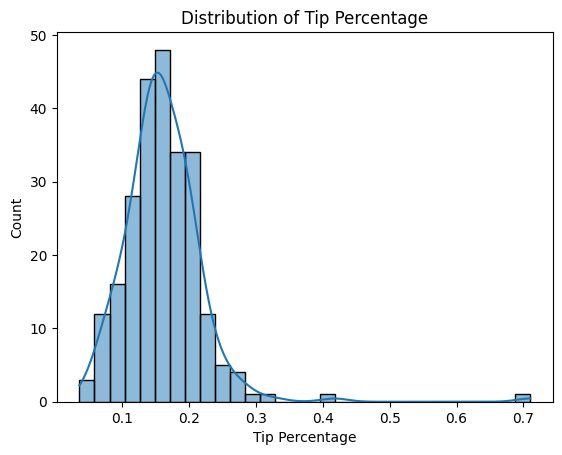

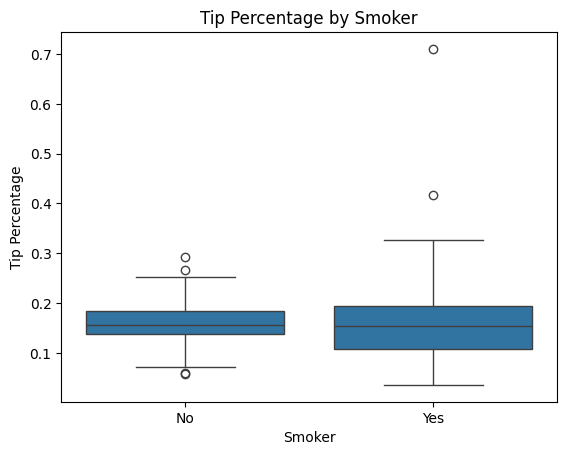

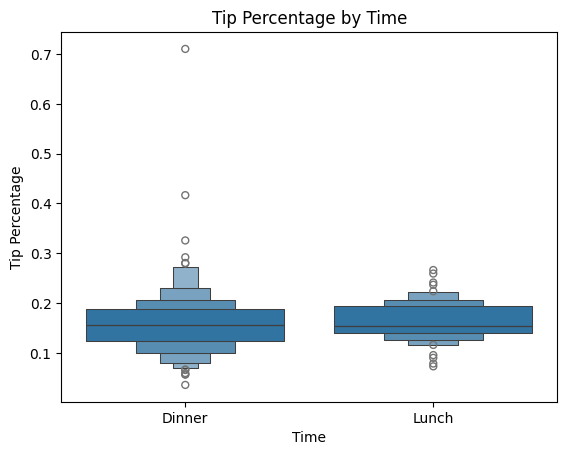

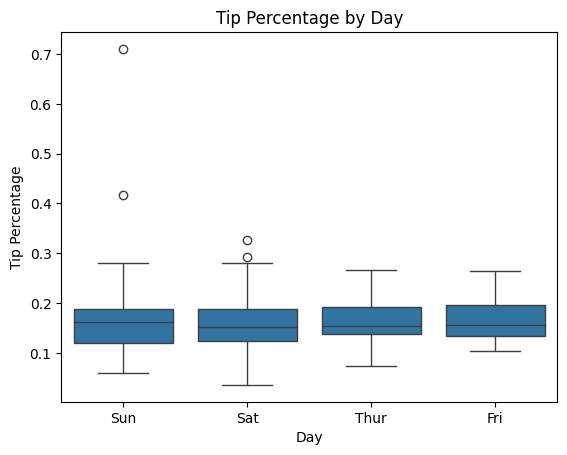

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) tip_pct 만들기
df["tip_pct"] = df["tip"] / df["total_bill"]

# 2) 시각화 코드 작성

# - tip_pct 히스토그램 분포

sns.histplot(df["tip_pct"], bins=30, kde=True)
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip Percentage")
plt.ylabel("Count")
plt.show()

# - smoker별 tip_pct boxplot

sns.boxplot(x="smoker", y="tip_pct", data=df)
plt.title("Tip Percentage by Smoker")
plt.xlabel("Smoker")
plt.ylabel("Tip Percentage")
plt.show()

# - time별 tip_pct boxplot

sns.boxenplot(x="time", y="tip_pct", data=df)
plt.title("Tip Percentage by Time")
plt.xlabel("Time")
plt.ylabel("Tip Percentage")
plt.show()

# - day별 tip_pct boxplot

sns.boxplot(x="day", y="tip_pct", data=df)
plt.title("Tip Percentage by Day")
plt.xlabel("Day")
plt.ylabel("Tip Percentage")
plt.show()

(2) 결론 도출 (서술형)

Q1. 둘 중 적절한 것을 고르세요.

- “EDA 결과, 팁 비율이 상대적으로 높은 그룹은 (Dinner / Lunch), (Non-Smoker/Smoker) 이다.”

Dinner, Non-smoker

Dinner: Median이 Lunch보다 약간 높고 상단 분포가 넓게 형성 되어있다. 값이 큰 outlier가 많이 존재한다.

Non-smoker: No의 median이 Yes보다 약간 높고, 전반적 분포도 Yes보다 높은 위치에서 조밀하게 형성되어서 일관되게 높은 팁을 확인 가능하다.

Q2. 빈칸에 적절한 말을 자유롭게 서술하세요.

- “이를 통해 레스토랑 운영자는 저녁 시간대와 비흡연 고객을 중심으로 한 서비스 강화 및 매출 극대화 전략, 프로모션 전략을 고려할 수 있다.”